<a href="https://colab.research.google.com/github/ritzz19/Google_stock_prediction/blob/master/RNN_Stock_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

In [0]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [0]:
#Creating a data structure with 60 timesteps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)


#BuIlding the RNN

In [0]:
#Reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [0]:
#Importing keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
#Initializing the RNN
regressor= Sequential()

In [0]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
#Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
#Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [0]:
#Adding an output layer
regressor.add(Dense(units=1))

In [0]:
#Compiling RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
#Fitting RNN to Training Set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 9s 8ms/step - loss: 0.0596
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] -

#Making the predictions and visualising the results

In [0]:
#Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [0]:
#Getting the predicted stock price of 2017
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [0]:
len(dataset_total)

1278

In [0]:
len(dataset_test)

20

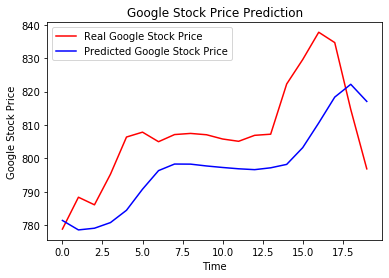

In [0]:
#Visualising the results
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()